<h2><center> Topic Modeling on Humanitarian Operations

This notebook shows how to perform topic modeling on a collection of research papers related to humanitarian operations. The objective is to uncover latent topics present in the documents, which can help to better understand trends, themes, and areas of focus within humanitarian research.

We will use Latent Dirichlet Allocation (LDA) for topic modeling, a popular technique for discovering abstract topics from a collection of documents. The following steps will guide us through loading the dataset, preprocessing the text, generating topics using LDA, and visualizing the results.

Key Steps:

1. Data collection (Through Web of Science and Scopus)
2. Data loading and text preprocessing.
3. Topic Modeling using LDA and Perplexity Evaluation.
4. Visualization of the topics.

---

Make sure to install the following libraries if it's the first time you are using them, with the commands "pip install". E.g.<code>pip intall pandas</code>

* <code>pandas</code>: For data manipulation and handling the dataset of papers.
* <code>nltk</code>: For natural language preprocessing, including tokenization, stop-word removal, and lemmatization.
* <code>gensim</code>: For topic modeling using Latent Dirichlet Allocation (LDA).
* <code>matplotlib/seaborn</code>: For visualizing the topics and their distribution across documents.

---

<h3>1. Data collection

SEARCH QUERY:
((disaster OR relief OR humanita*) AND (logistic OR supply AND chain OR operati* OR respons* OR prepare* OR mitigat* OR recover*))

<h3>2. Data loading and text processing

<h3> 2.1. Data loading

In [1]:
# Main libraries for this step
import pandas as pd
import numpy as np

In this case, the dataset is composed by abstracts from Web of Science and Scopus. Each dataset has its own particularities, that will be explained in the following steps.

<h4>Web of Science

In [2]:
# Depending on your dataset(s) and number of files, you will need to read them in this section. 
# Make sure to check the file type beforehand, pandas library offers a range of functions to read different CSV, JSON, XLSX,...
# Web of Science only allows to download 1000 abstracts per query, therefore this step will join all the records in just one dataset.
w1 = pd.read_excel('savedrecs (1).xls')
w2 = pd.read_excel('savedrecs (2).xls')
w3 = pd.read_excel('savedrecs (3).xls')
w4 = pd.read_excel('savedrecs (4).xls')
w5 = pd.read_excel('savedrecs (5).xls')
w6 = pd.read_excel('savedrecs (6).xls')
w7 = pd.read_excel('savedrecs (7).xls')
w8 = pd.read_excel('savedrecs (8).xls')
w9 = pd.read_excel('savedrecs (9).xls')
w10 = pd.read_excel('savedrecs (10).xls')
w11 = pd.read_excel('savedrecs (11).xls')
w12 = pd.read_excel('savedrecs (12).xls')
w13 = pd.read_excel('savedrecs (13).xls')
w14 = pd.read_excel('savedrecs (14).xls')
w15 = pd.read_excel('savedrecs (15).xls')
w16 = pd.read_excel('savedrecs (16).xls')
w17 = pd.read_excel('savedrecs (17).xls')
w18 = pd.read_excel('savedrecs (18).xls')
w19 = pd.read_excel('savedrecs (19).xls')
w20 = pd.read_excel('savedrecs (20).xls')
w21 = pd.read_excel('savedrecs (21).xls')
w22 = pd.read_excel('savedrecs (22).xls')
w23 = pd.read_excel('savedrecs (23).xls')
w24 = pd.read_excel('savedrecs (24).xls')
w25 = pd.read_excel('savedrecs (25).xls')
w26 = pd.read_excel('savedrecs (26).xls')
w27 = pd.read_excel('savedrecs (27).xls')
w28 = pd.read_excel('savedrecs (28).xls')
w29 = pd.read_excel('savedrecs (29).xls')
w30 = pd.read_excel('savedrecs (30).xls')
w31 = pd.read_excel('savedrecs (31).xls')

In [3]:
# A list is created with all the read files
list_wos = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25,w26, w27, w28, w29, w30, w31]  # List of the dataframes
# These are concatenated in just one only variable
data_wos = pd.concat(list_wos)

In [4]:
# Number of raw records in Web of Science (considering blanks/missing values)
len(data_wos)

30369

In [5]:
# Metadata in Web of Science records
data_wos.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [6]:
# Selection of relevant features from the dataset and renaming column names for standardization
df_wos = pd.DataFrame()
df_wos['DOI'] = data_wos['DOI']
df_wos['Article_Title'] = data_wos['Article Title']
df_wos['Abstract'] = data_wos['Abstract']
df_wos['Author_Keywords'] = data_wos['Author Keywords']
df_wos['Author_Full_Names'] = data_wos['Author Full Names']
df_wos['Source_Title'] = data_wos['Source Title']
df_wos['Publication_Year'] = data_wos['Publication Year']
df_wos['DB'] = 'Web of Science' 

In [7]:
# Example of the first records in the Web of Science dataset
df_wos.head()

,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science
2,10.1016/j.ijdrr.2017.10.005,Integrated blood supply chain planning for dis...,This paper proposes a multi-objective mixed in...,Blood supply chain; Disaster relief; Multi-obj...,"Samani, Mohammad Reza Ghatreh; Torabi, S. Ali;...",INTERNATIONAL JOURNAL OF DISASTER RISK REDUCTION,2018,Web of Science
3,10.1057/palgrave.jors.2602125,Blackett Memorial Lecture - Humanitarian aid l...,This paper builds on the idea that private sec...,emergency relief operations; humanitarian logi...,"Van Wassenhove, LN",JOURNAL OF THE OPERATIONAL RESEARCH SOCIETY,2006,Web of Science
4,10.1111/jbl.12362,Inherent and adaptive resilience of logistics ...,This study aims to investigate the sources of ...,adaptive resilience; disaster; food supply cha...,"Umar, Muhammad; Wilson, Mark M. J.",JOURNAL OF BUSINESS LOGISTICS,2024,Web of Science


In [8]:
# Drop blanks or missing values
df_wos = df_wos.dropna()

In [9]:
# Number of records and number of columns after dropping blanks/missing values
df_wos.shape

(24506, 8)

In [10]:
# Saving the Web of Science unified file without blank/missing values
df_wos.to_csv("wos.csv",index=False)

<h4> Scopus

In [11]:
#Scopus allows to download more records per query, in this case we only have one file that contains in total 7523 records.
data_scopus = pd.read_csv('scopus original.csv')

In [12]:
len(data_scopus)

7523

In [13]:
# Metadata in Scopus records
data_scopus.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [14]:
# Selection of relevant features from the dataset and renaming column names for standardization
df_scopus = pd.DataFrame()
df_scopus['DOI'] = data_scopus['DOI']
df_scopus['Article_Title'] = data_scopus['Title']
df_scopus['Abstract'] = data_scopus['Abstract']
df_scopus['Author_Keywords'] = data_scopus['Author Keywords']
df_scopus['Author_Full_Names'] = data_scopus['Authors']
df_scopus['Source_Title'] = data_scopus['Source title']
df_scopus['Publication_Year'] = data_scopus['Year']
df_scopus['DB'] = 'Scopus'

In [15]:
# Number of records and number of columns before dropping blanks/missing values
df_scopus.shape

(7523, 8)

In [16]:
# Drop blanks or missing values
df_scopus = df_scopus.dropna()

In [17]:
# Number of records and number of columns after dropping blanks/missing values
df_scopus.shape

(5902, 8)

In [18]:
# Selecting and dropping records that aren't empty but have 'No abstract available'/'No author available' 
df_scopus = df_scopus.drop(df_scopus[df_scopus['Abstract'] == '[No abstract available]'].index) 
df_scopus = df_scopus.drop(df_scopus[df_scopus['Author_Full_Names'] == '[No author available]'].index) 

In [19]:
# Number of records and number of columns after dropping cases with specificified condition
df_scopus.shape

(5898, 8)

In [20]:
# Saving the Scopus unified file without blank/missing values
df_scopus.to_csv("scopus.csv",index=False)

---

<h4> Concatenating WoS with Scopus in one dataset

In [21]:
# This command allows to concatenate the Scopus and Web of Science datasets in one dataset
df_wos_scopus = pd.DataFrame()
df_wos_scopus = pd.concat([df_wos,df_scopus], ignore_index=True)

In [22]:
# Final raw number of records and columns (including duplicates within the datasets)
df_wos_scopus.shape

(30404, 8)

In [23]:
# This helps to find the duplicated records in the dataset
df_wos_scopus = df_wos_scopus.drop_duplicates()
df_wos_scopus.shape

(28814, 8)

In [24]:
# Formatting Author Keywords as string, for following text processing
df_wos_scopus['Author_Keywords'] = df_wos_scopus['Author_Keywords'].astype(str)
# After deleting some rows due to the condition above, we need to restart the count index
df_wos_scopus.reset_index(drop=True, inplace=True)
df_wos_scopus.shape

(28814, 8)

In [25]:
# To facilitate later processing, Article title, abstract and keywords are joined in a single dataset column
df_wos_scopus['Input'] = df_wos_scopus[['Article_Title', 'Abstract', 'Author_Keywords' ]].agg('-'.join, axis=1)

In [26]:
# Saving the unified file without duplicate values
df_wos_scopus.to_excel('df_wos_scopus_vf.xlsx',index=False)

In [74]:
db_counts = df_wos_scopus.groupby('DB').size().reset_index(name='Publication_Count')
db_counts

,DB,Publication_Count
0,Scopus,5898
1,Web of Science,22916


---

<h3> 2.2. Text processing

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
# Given a string of text, rejects words with less than 3 characters, numbers, underscores, whitespace, quote marks, and other punctuation
def firstclean(texto):
    out = []
    texto = texto.lower()
    tokens =  re.findall(r'[a-zA-Z]+',texto)
    for w in tokens:
        if (len(w)>3):
            out.append(w)
    
    return " ".join(out)

In [32]:
%%time
# Application of the function in the Input column
df_wos_scopus['Cleaned_text'] = df_wos_scopus['Input'].apply(firstclean)

Wall time: 0 ns


In [33]:
# This function lowercases, tokenizes in single words, removes non-alphabets and stopwords in all texts
stopwords = list(stopwords.words('english'))
# academic vocab 
extras = ['humanitarian','relief', 'disaster', 'logistic', 'supply', 'chain', 'operations', 'response', 'preparedness', 'mitigation', 'recovery','abstract','research','paper','purpose', 'design', 'methodology', 'approach', 'findings', 'use', 'analysis', 'practical', 'result', 'problem', 'article', 'implications', 'originality', 'value', 'conclusion', 'method', 'result','study','aims','aim']
# join both lists
sw = stopwords + extras

def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic words
    tokens = [word for word in tokens if word not in sw]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [34]:
%%time
# Application of the function in the Input column
df_wos_scopus['Processed_text'] = df_wos_scopus['Cleaned_text'].apply(preprocess)

Wall time: 0 ns


In [35]:
df_wos_scopus

,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB,Input,Cleaned_text,Processed_text
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science,Humanitarian and Disaster Relief Supply Chains...,humanitarian disaster relief supply chains mat...,"[chain, matter, life, death, increasing, numbe..."
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science,Disaster-Relief Logistics With Limited Fuel Su...,disaster relief logistics with limited fuel su...,"[logistics, limited, fuel, logistics, consists..."
2,10.1016/j.ijdrr.2017.10.005,Integrated blood supply chain planning for dis...,This paper proposes a multi-objective mixed in...,Blood supply chain; Disaster relief; Multi-obj...,"Samani, Mohammad Reza Ghatreh; Torabi, S. Ali;...",INTERNATIONAL JOURNAL OF DISASTER RISK REDUCTION,2018,Web of Science,Integrated blood supply chain planning for dis...,integrated blood supply chain planning disaste...,"[integrated, blood, planning, proposes, multi,..."
3,10.1057/palgrave.jors.2602125,Blackett Memorial Lecture - Humanitarian aid l...,This paper builds on the idea that private sec...,emergency relief operations; humanitarian logi...,"Van Wassenhove, LN",JOURNAL OF THE OPERATIONAL RESEARCH SOCIETY,2006,Web of Science,Blackett Memorial Lecture - Humanitarian aid l...,blackett memorial lecture humanitarian logisti...,"[blackett, memorial, lecture, logistics, manag..."
4,10.1111/jbl.12362,Inherent and adaptive resilience of logistics ...,This study aims to investigate the sources of ...,adaptive resilience; disaster; food supply cha...,"Umar, Muhammad; Wilson, Mark M. J.",JOURNAL OF BUSINESS LOGISTICS,2024,Web of Science,Inherent and adaptive resilience of logistics ...,inherent adaptive resilience logistics operati...,"[inherent, adaptive, resilience, logistics, fo..."
...,...,...,...,...,...,...,...,...,...,...,...
28809,10.1038/sc.1993.113,Relief of spasticity in SCI men and women usin...,Although there are numerous approaches to the ...,Disability; Electrostimulation; Spasticity; Sp...,Halstead L.S.; Seager S.W.J.; Houston J.M.; Wh...,Paraplegia,1993,Scopus,Relief of spasticity in SCI men and women usin...,relief spasticity women using rectal probe ele...,"[spasticity, woman, using, rectal, probe, elec..."
28810,10.1080/07488009308409073,"Initial medical reception, intervention and su...",Service medical teams were involved in the med...,Medical intervention; Medical screening; North...,Miller A.R.O.; Kershaw C.R.,Medicine and War,1993,Scopus,"Initial medical reception, intervention and su...",initial medical reception intervention survey ...,"[initial, medical, reception, intervention, su..."
28811,10.1111/j.1600-0722.1993.tb01138.x,Microvasculature of the dorsum of the rat tong...,The purpose of this study was to examine the m...,corrosion cast; microvasculature; rat; sphinct...,Selliseth N.J.; Selvig K.A.,European Journal of Oral Sciences,1993,Scopus,Microvasculature of the dorsum of the rat tong...,microvasculature dorsum tongue scanning electr...,"[microvasculature, dorsum, tongue, scanning, e..."
28812,10.1016/0167-4730(93)90015-S,Earthquake damage estimation and decision anal...,Earthquake damage estimation for lifelines can...,earthquake damage; fuzzy decision analysis; fu...,Cret L.; Yamazaki F.; Nagata S.; Katayama T.,Structural Safety,1993,Scopus,Earthquake damage estimation and decision anal...,earthquake damage estimation decision analysis...,"[earthquake, damage, estimation, decision, eme..."


In this matrix each document is represented as a vector of word counts or term frequencies.

In [3]:
from gensim import corpora

In [39]:
# Create dictionary and DTM
dictionary = corpora.Dictionary(df_wos_scopus['Processed_text'])
corpus = [dictionary.doc2bow(text) for text in df_wos_scopus['Processed_text']]

---

<h3> 3. Topic Modeling using LDA and Perplexity Evaluation

### 3.1. Latent Dirichlet Allocation (LDA)

<code>Blei, D. M., Ng, A. Y., & Jordan, M. I. (2003). Latent dirichlet allocation. Journal of machine Learning research, 3(Jan), 993-1022.</code>

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used to represent documents as mixtures of topics, where each topic is a distribution over words. The goal of LDA is to uncover the hidden thematic structure (topics) in a large collection of documents.

The formula for LDA is:

$$
P(\mathbf{w}, \mathbf{z}, \theta, \phi \mid \alpha, \beta) = P(\theta \mid \alpha) \prod_{k=1}^{K} P(\phi_k \mid \beta) \prod_{n=1}^{N} P(z_n \mid \theta) P(w_n \mid z_n, \phi)
$$

Where:
- $\mathbf{w} = (w_1, w_2, \dots, w_N)$ are the words in the document.
- $\mathbf{z} = (z_1, z_2, \dots, z_N)$ are the topic assignments for each word.
- $\theta$ is the topic distribution for the document.
- $\phi_k$ is the word distribution for topic $k$.
- $\alpha$ and $\beta$ are hyperparameters that control the distributions of topics and words.

### Components:
1. **Document-Topic Distribution ($\theta$)**: 
   - This is the distribution of topics within a document.
   - It follows a Dirichlet distribution with parameter $\alpha$, which controls the sparsity of topic proportions in a document. Higher $\alpha$ values lead to more diverse topic mixtures per document.
   - $P(\theta \mid \alpha)$ is the probability of the topic distribution given the Dirichlet prior $\alpha$.

2. **Topic-Word Distribution ($\phi_k$)**:
   - Each topic is represented as a distribution over words.
   - This also follows a Dirichlet distribution with parameter $\beta$, which controls how many words are likely to appear in a topic. A higher $\beta$ leads to more words being assigned to each topic.
   - $P(\phi_k \mid \beta)$ is the probability of the word distribution for topic $k$ given the Dirichlet prior $\beta$.

3. **Topic Assignment ($z_n$)**:
   - Each word $w_n$ in the document is assigned to a topic $z_n$.
   - $P(z_n \mid \theta)$ is the probability of assigning word $n$ to topic $z_n$, based on the document’s topic distribution $\theta$.

4. **Word Likelihood ($P(w_n \mid z_n, \phi)$)**:
   - Given a topic $z_n$, the word $w_n$ is drawn from the corresponding topic’s word distribution $\phi_{z_n}$.
   - This is the likelihood of observing the word $w_n$ in the document under the topic assignment $z_n$.

### Generative Process:
1. For each document $d$, sample a topic distribution $\theta_d \sim \text{Dir}(\alpha)$.
2. For each topic $k$, sample a word distribution $\phi_k \sim \text{Dir}(\beta)$.
3. For each word $n$ in the document:
   - Sample a topic $z_n \sim \text{Multinomial}(\theta_d)$.
   - Sample a word $w_n \sim \text{Multinomial}(\phi_{z_n})$.

### 3.2. Perplexity Formula

Perplexity is a measurement used to evaluate how well a probabilistic model, such as Latent Dirichlet Allocation (LDA), predicts a set of data. The formula for perplexity is:

$$
\text{Perplexity}(D) = \exp \left( - \frac{ \sum_{d=1}^{M} \log P(w_d) }{ \sum_{d=1}^{M} N_d } \right)
$$
Where:
- $D$ is the corpus (set of documents).
- $M$ is the number of documents in the corpus.
- $N_d$ is the number of words in document $d$.
- $w_d$ are the words in document $d$.
- $P(w_d)$ is the likelihood of the words in document $d$ under the given model.

### Components:
- **Log-Likelihood $P(w_d)$**: The probability of the words in a document given the learned topics. This is the likelihood of the words occurring according to the distribution of topics and word probabilities learned by the LDA model.
- **Summation of Log-Likelihood**: The summation $\sum_{d=1}^{M} \log P(w_d)$ gives the log-likelihood of the entire corpus.
- **Normalization by Total Words**: The total number of words across all documents, $\sum_{d=1}^{M} N_d\$, normalizes the log-likelihood by the corpus size to avoid biases from the number of documents or length of documents.
- **Exponential Function**: Finally, the exponential function is applied to convert the negative log-likelihood into the perplexity score, making it more interpretable (lower values indicate better fit).

A lower perplexity score indicates that the model better predicts the words in the documents, thus representing the topics more accurately.


---

In this step, we will train an LDA model on the document-term matrix to extract topics. In that sense, we will iterate over a range of "k" topics, and choose the best fit for our dataset. **The ideal number of "k" topics will vary depending on each dataset.**

In [4]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

In [42]:
def compute_lda_models(corpus, dictionary, start, end):
    perplexities = []
    for num_topics in range(start, end + 1):
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        
        # Calculate perplexity
        perplexity = lda_model.log_perplexity(corpus)
        perplexities.append((num_topics, perplexity))
        
        print(f'Number of Topics: {num_topics}, Perplexity: {perplexity}')
    
    return perplexities

In [43]:
%%time
# Trying LDA models with different numbers of topics
start_topic = 3
end_topic = 15
perplexities = compute_lda_models(corpus, dictionary, start_topic, end_topic)

Number of Topics: 3, Perplexity: -7.9717164093897805
Number of Topics: 4, Perplexity: -7.9308493653707615
Number of Topics: 5, Perplexity: -7.912621750129912
Number of Topics: 6, Perplexity: -7.924463883888908
Number of Topics: 7, Perplexity: -7.957719836918799
Number of Topics: 8, Perplexity: -8.00120285221178
Number of Topics: 9, Perplexity: -8.067596131447843
Number of Topics: 10, Perplexity: -8.175935832816188
Number of Topics: 11, Perplexity: -8.314197076944122
Number of Topics: 12, Perplexity: -8.475734196632342
Number of Topics: 13, Perplexity: -8.610165541402237
Number of Topics: 14, Perplexity: -8.69867196630152
Number of Topics: 15, Perplexity: -8.786809702825838
Wall time: 51min 43s


In [5]:
# Plot the perplexity values to visually inspect the best number of topics
import matplotlib.pyplot as plt

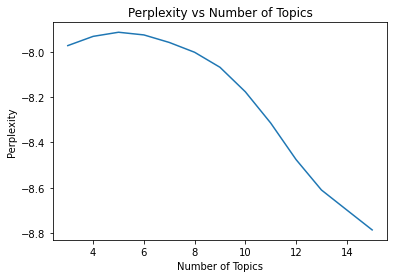

In [45]:
x = [x[0] for x in perplexities]
y = [x[1] for x in perplexities]

plt.plot(x, y)
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')
#plt.savefig('perplexity_vs_topics.png', format='png', dpi=300)  # You can uncomment this command if you want to save the figure
plt.show()

### Selecting best 'K'
Since perplexity is a negative log likelihood, more negative values indicate worse models. Thus, the best model will have the least negative perplexity value.
The perplexity decreases until reaching the fourth topic and starts to increase with more topics (after k=5), indicating potential overfitting with higher numbers of topics.

In [46]:
# Keep best K for LDA model
num_topics = 4  # Adjust based on your dataset
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print topics
topics = lda_model.print_topics(num_words=10) # the number of most frequent words per topic is selected per researcher choice
for topic in topics:
    print(topic)

(0, '0.008*"community" + 0.008*"management" + 0.007*"social" + 0.006*"food" + 0.006*"risk" + 0.005*"policy" + 0.005*"crisis" + 0.005*"resilience" + 0.004*"development" + 0.004*"change"')
(1, '0.020*"health" + 0.018*"patient" + 0.013*"care" + 0.011*"pain" + 0.009*"emergency" + 0.009*"hospital" + 0.009*"covid" + 0.008*"medical" + 0.007*"treatment" + 0.006*"pandemic"')
(2, '0.014*"model" + 0.010*"water" + 0.009*"system" + 0.007*"risk" + 0.006*"area" + 0.006*"based" + 0.006*"network" + 0.005*"time" + 0.005*"flood" + 0.005*"emergency"')
(3, '0.010*"health" + 0.009*"risk" + 0.008*"stress" + 0.008*"among" + 0.008*"factor" + 0.007*"mental" + 0.007*"child" + 0.007*"hurricane" + 0.007*"associated" + 0.006*"symptom"')


Based on the most frequent words in each topic, here are some suggested titles for each:

0. **Community Resilience and Management**  
   Keywords: community, management, social, food, risk, policy, crisis, resilience, development, change

1. **Healthcare in Emergency Situations**  
   Keywords: health, patient, care, pain, emergency, hospital, covid, medical, treatment, pandemic

2. **Risk Management Systems**  
   Keywords: model, water, system, risk, area, based, network, time, flood, emergency

3. **Mental Health During Disasters**  
   Keywords: health, risk, stress, among, factor, mental, child, hurricane, associated, symptom


In [47]:
# For each document, this function will find the topic with the highest contribution
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        dominant_topics.append(dominant_topic)
    return dominant_topics

In [48]:
df_wos_scopus['dominant_topic'] = get_dominant_topic(lda_model, corpus)

In [53]:
# Define a function to map dominant_topic to dominant_topic_name
def map_topic_name(dominant_topic):
    if dominant_topic == 0:
        return 'Community Resilience and Management'
    elif dominant_topic == 1:
        return 'Healthcare in Emergency Situations'
    elif dominant_topic == 2:
        return 'Risk Management Systems'
    elif dominant_topic == 3:
        return 'Mental Health Risks During Disasters'
    else:
        return None

In [54]:
df_wos_scopus['dominant_topic_name'] = df_wos_scopus['dominant_topic'].apply(map_topic_name)

In [7]:
df_wos_scopus.head(3)

,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB,Input,Cleaned_text,Processed_text,dominant_topic,dominant_topic_name
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science,Humanitarian and Disaster Relief Supply Chains...,humanitarian disaster relief supply chains mat...,"['chain', 'matter', 'life', 'death', 'increasi...",0,Community Resilience and Management
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science,Disaster-Relief Logistics With Limited Fuel Su...,disaster relief logistics with limited fuel su...,"['logistics', 'limited', 'fuel', 'logistics', ...",2,Risk Management Systems
2,10.1016/j.ijdrr.2017.10.005,Integrated blood supply chain planning for dis...,This paper proposes a multi-objective mixed in...,Blood supply chain; Disaster relief; Multi-obj...,"Samani, Mohammad Reza Ghatreh; Torabi, S. Ali;...",INTERNATIONAL JOURNAL OF DISASTER RISK REDUCTION,2018,Web of Science,Integrated blood supply chain planning for dis...,integrated blood supply chain planning disaste...,"['integrated', 'blood', 'planning', 'proposes'...",2,Risk Management Systems


In [56]:
df_wos_scopus.to_csv('final_dataset.csv',index=False)

---

<h3>4. Visualization of the topics

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Directly read the final_dataset.csv instead of running all the previous cells
df_wos_scopus = pd.read_csv('final_dataset.csv')

### 4.1. Publications Per Year by Topic

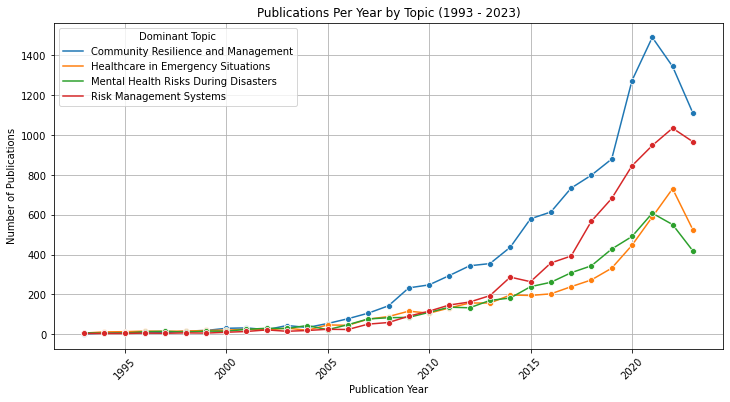

In [76]:
# Filter data until 2023 (complete year by the end of this code)
df_filtered = df_wos_scopus[df_wos_scopus['Publication_Year'] <= 2023]

# Count of publications per year and dominant topic
publications_per_year = df_filtered.groupby(['Publication_Year', 'dominant_topic_name']).size().reset_index(name='Counts')

# Graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=publications_per_year, x='Publication_Year', y='Counts', hue='dominant_topic_name', marker='o')
plt.title('Publications Per Year by Topic (1993 - 2023)')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.legend(title='Dominant Topic')
plt.grid()

# Uncomment to save the figure
#plt.savefig('publications_per_year_by_topic.png', format='png', dpi=300)
plt.show()

### 4.2. Publications by Topic Distribution

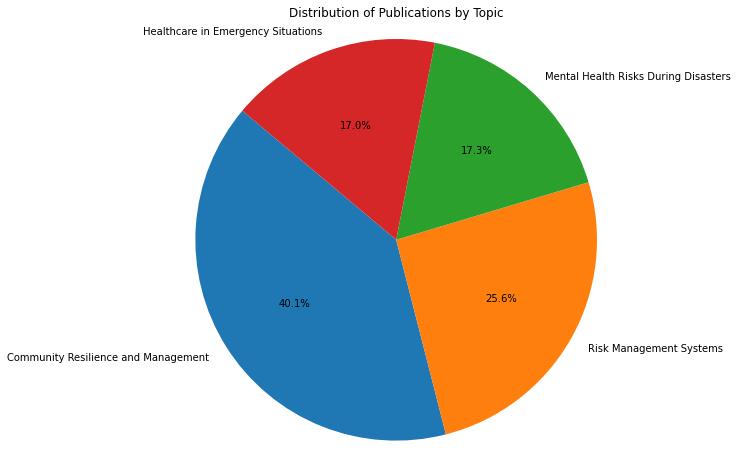

In [37]:
topic_distribution = df_wos_scopus['dominant_topic_name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(topic_distribution, labels=topic_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Publications by Topic')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.savefig('publications_distribution_by_topic.png', format='png', dpi=300)
plt.show()

### 4.3. Total Publications Per Topic

In [16]:
# Create a mapping to shorten or format the topic names for better readability
def format_topic_name(name):
    if name == 'Community Resilience and Management':
        return 'Community Resilience\nand Management'
    elif name == 'Healthcare in Emergency Situations':
        return 'Healthcare in\nEmergency Situations'
    elif name == 'Risk Management Systems':
        return 'Risk Management\nSystems'
    elif name == 'Mental Health Risks During Disasters':
        return 'Mental Health Risks\nDuring Disasters'
    else:
        return name

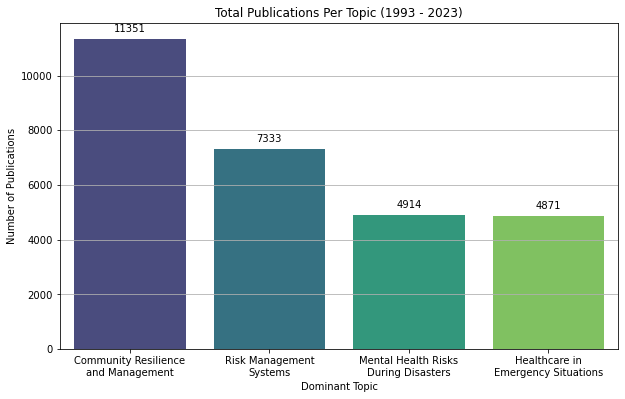

In [18]:
# Apply the formatting function to the topic names
publications_per_topic['dominant_topic_name'] = publications_per_topic['dominant_topic_name'].apply(format_topic_name)

# Graph
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=publications_per_topic, x='dominant_topic_name', y='Counts', palette='viridis')

# Add totals on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Total Publications Per Topic (1993 - 2023)')
plt.xlabel('Dominant Topic')
plt.ylabel('Number of Publications')
plt.xticks(rotation=0)  
plt.grid(axis='y')

# Uncomment to save the figure
# plt.savefig('total_publications_per_topic.png', format='png', dpi=300)
plt.show()

### 4.4. Publications Per Topic by Source

In [22]:
# Publications per source title
publications_per_source = df_wos_scopus.groupby(['Source_Title', 'dominant_topic_name']).size().reset_index(name='Counts')

# Top 10 sources by total publications
top_sources = publications_per_source.groupby('Source_Title')['Counts'].sum().nlargest(5).index
filtered_publications = publications_per_source[publications_per_source['Source_Title'].isin(top_sources)]

In [23]:
# Function to format source titles for better readability
def format_source_title(title):
    return title.title()  # Convert to title case

# Apply the formatting function to the source titles
filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)

<ipython-input-23-6eb4a571900b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)


In [33]:
# Create a mapping for the source titles to shorten with line breaks
def format_source_title(title):
    if title == 'Disaster Medicine And Public Health Preparedness':
        return 'Disaster Medicine\nand Public Health\nPreparedness'
    elif title == 'Disasters':
        return 'Disasters'
    elif title == 'International Journal Of Disaster Risk Reduction':
        return 'Int. Journal of\nDisaster Risk\nReduction'
    elif title == 'International Journal Of Environmental Research And Public Health':
        return 'Int. Journal of\nEnvironmental Research\nand Public Health'
    elif title == 'Sustainability':
        return 'Sustainability'
    else:
        return title

# Apply the formatting function to the Source_Title column
filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)

<ipython-input-33-b8d241afe4c3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)


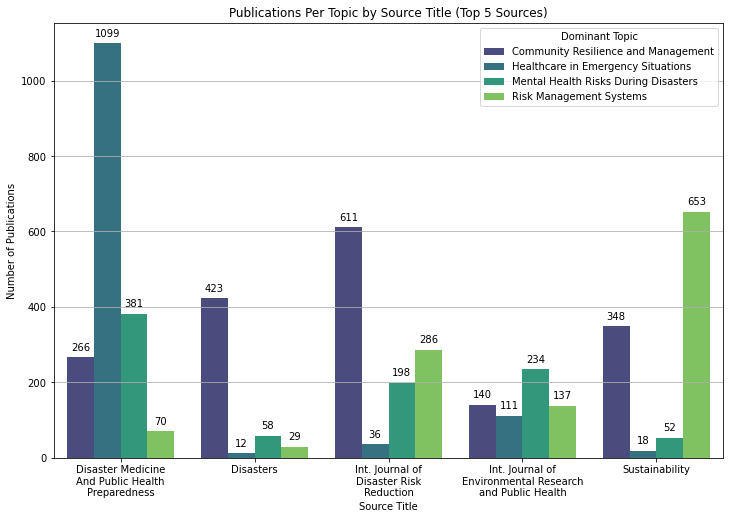

In [35]:
# Graph
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=filtered_publications, x='Source_Title', y='Counts', hue='dominant_topic_name', palette='viridis')

# Add totals on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Publications Per Topic by Source Title (Top 5 Sources)')
plt.xlabel('Source Title')
plt.ylabel('Number of Publications')
plt.xticks()
plt.legend(title='Dominant Topic')
plt.grid(axis='y')

# Save the figure if required
# plt.savefig('publications_top5_sources.png', format='png', dpi=300)
plt.show()

### 4.5. Heatmap of Publications per Topic and Year

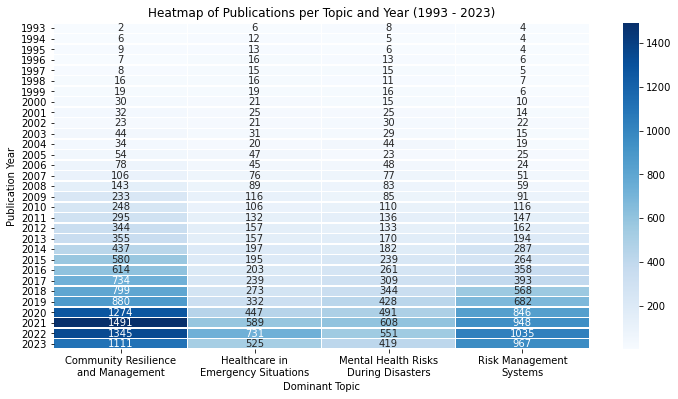

In [28]:
# Format the dominant topic names in the publications_per_year DataFrame
publications_per_year['dominant_topic_name'] = publications_per_year['dominant_topic_name'].apply(format_topic_name)

# Pivot table for the heatmap
heatmap_data = publications_per_year.pivot('Publication_Year', 'dominant_topic_name', 'Counts').fillna(0)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Publications per Topic and Year (1993 - 2023)')
plt.xlabel('Dominant Topic')
plt.ylabel('Publication Year')

# Uncomment to save the figure
#plt.savefig('heatmap_publications_per_topic_and_year.png', format='png', dpi=300)
plt.show()

### 4.6. Top Sources per Topic

In [42]:
topics = [
    'Community Resilience and Management',
    'Healthcare in Emergency Situations',
    'Risk Management Systems',
    'Mental Health Risks During Disasters'
]

# Format to title 
def format_source_title(title):
    return title.title()

top_sources_by_topic = []

for topic in topics:
    filtered_data = df_wos_scopus[df_wos_scopus['dominant_topic_name'] == topic]
    
    source_counts = filtered_data['Source_Title'].value_counts().reset_index()
    source_counts.columns = ['Source_Title', 'Counts']
    
    source_counts['Source_Title'] = source_counts['Source_Title'].apply(format_source_title)
    
    # Get the top 5 sources for the topic
    top_sources = source_counts.head(5)
    top_sources['Dominant_Topic'] = topic
    top_sources_by_topic.append(top_sources)

# Combine results into a single DataFrame
result_df = pd.concat(top_sources_by_topic, ignore_index=True)
result_df

<ipython-input-42-746c84b96d04>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sources['Dominant_Topic'] = topic


,Source_Title,Counts,Dominant_Topic
0,International Journal Of Disaster Risk Reduction,611,Community Resilience and Management
1,Disasters,423,Community Resilience and Management
2,Disaster Prevention And Management,351,Community Resilience and Management
3,Sustainability,348,Community Resilience and Management
4,Disaster Medicine And Public Health Preparedness,266,Community Resilience and Management
5,Disaster Medicine And Public Health Preparedness,1099,Healthcare in Emergency Situations
6,Journal Of Pain And Symptom Management,151,Healthcare in Emergency Situations
7,International Journal Of Environmental Researc...,111,Healthcare in Emergency Situations
8,Disaster Medicine And Public Health Preparedness,78,Healthcare in Emergency Situations
9,Frontiers In Public Health,70,Healthcare in Emergency Situations


In [43]:
result_df.to_excel('sources_per_topic.xlsx')

### 4.7. COVID check

<ipython-input-59-4d7bd374f641>:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  lambda x: x.str.contains(keywords_pattern, na=False).any(), axis=1


Number of Papers per Year (Pandemic vs Non-Pandemic Related) with Percentage:
is_pandemic_related  False  True  Percentage_Pandemic_Related
Publication_Year                                             
1993                    20     0                     0.000000
1994                    27     0                     0.000000
1995                    32     0                     0.000000
1996                    42     0                     0.000000
1997                    43     0                     0.000000
1998                    50     0                     0.000000
1999                    60     0                     0.000000
2000                    76     0                     0.000000
2001                    96     0                     0.000000
2002                    96     0                     0.000000
2003                   119     0                     0.000000
2004                   117     0                     0.000000
2005                   149     0                     0

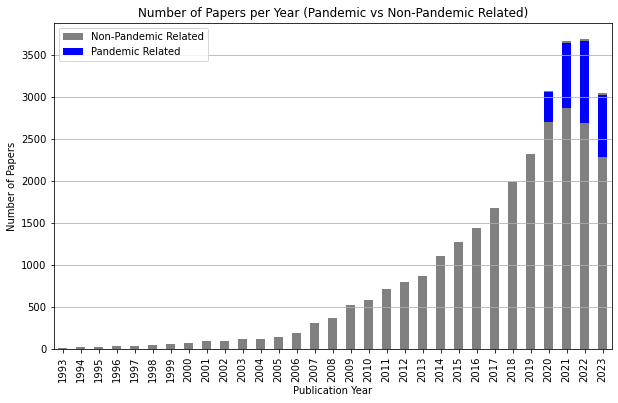

In [59]:
df_wos_scopus['Publication_Year'] = pd.to_numeric(df_wos_scopus['Publication_Year'], errors='coerce')

# Define the keywords for identifying pandemic-related publications
keywords_pattern = r'(?i)\b(pandemi\*|covid|coronavirus|sars-cov-2|sarscov2)\b'

# Check for pandemic-related keywords in the specified columns
df_wos_scopus['is_pandemic_related'] = df_wos_scopus[['Article_Title', 'Abstract', 'Author_Keywords']].apply(
    lambda x: x.str.contains(keywords_pattern, na=False).any(), axis=1
)

# Filter publications until 2023
df_filtered = df_wos_scopus[df_wos_scopus['Publication_Year'] <= 2023]

# Group by year and pandemic status
year_counts = df_filtered.groupby(['Publication_Year', 'is_pandemic_related']).size().unstack(fill_value=0)

# Calculate percentage of pandemic-related publications
year_counts['Percentage_Pandemic_Related'] = (year_counts[True] / year_counts.sum(axis=1)) * 100

print("Number of Papers per Year (Pandemic vs Non-Pandemic Related) with Percentage:")
print(year_counts)

# Plotting
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
year_counts.plot(kind='bar', stacked=True, color=['gray', 'blue'], ax=plt.gca())

plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.title('Number of Papers per Year (Pandemic vs Non-Pandemic Related)')
plt.legend(['Non-Pandemic Related', 'Pandemic Related'])
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Save the figure if required
plt.savefig('pandemic_vs_non_pandemic.png', format='png', dpi=300)

plt.show()